<a href="https://colab.research.google.com/github/NaamaAmer/2023-4516CSQR-Group1/blob/main/2023_4516CSQR_Group1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis For Comparing COVID-19 By continent**

*   Dataset can be downloaded from: https://ourworldindata.org/coronavirus/country/united-kingdom




#1.  Imporing required libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import csv
from google.colab import files
sns.set(color_codes=True)
%matplotlib inline

# 2. Loading data into data frames

In [ ]:
data = pd.read_csv("owid-covid-data.csv")
data.head(5)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,1/3/2020,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,1/4/2020,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,1/5/2020,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,1/6/2020,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,1/7/2020,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [ ]:
data.tail(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
295830,ZWE,Africa,Zimbabwe,3/12/2023,264385.0,13.0,16.429,5672.0,0.0,0.143,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
295831,ZWE,Africa,Zimbabwe,3/13/2023,264391.0,6.0,16.429,5672.0,0.0,0.143,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
295832,ZWE,Africa,Zimbabwe,3/14/2023,264391.0,0.0,14.857,5672.0,0.0,0.143,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
295833,ZWE,Africa,Zimbabwe,3/15/2023,264391.0,0.0,10.857,5672.0,0.0,0.000,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
295834,ZWE,Africa,Zimbabwe,3/16/2023,264391.0,0.0,8.429,5672.0,0.0,0.000,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


In [ ]:
data.shape

(295835, 67)

#3. Checking the data types

In [ ]:
data.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
population                                   int64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

#4. Remove unwanted features 

In [ ]:
data = data.drop(['excess_mortality_cumulative_absolute','excess_mortality_cumulative','excess_mortality','excess_mortality_cumulative_per_million','life_expectancy','hospital_beds_per_thousand','handwashing_facilities','male_smokers','female_smokers','diabetes_prevalence','cardiovasc_death_rate','extreme_poverty','aged_70_older','aged_65_older','stringency_index','new_people_vaccinated_smoothed_per_hundred','new_people_vaccinated_smoothed','new_vaccinations_smoothed_per_million','people_fully_vaccinated_per_hundred','people_vaccinated_per_hundred','total_boosters_per_hundred','new_vaccinations_smoothed','tests_units','tests_per_case','positive_rate','new_tests_smoothed_per_thousand','new_tests_smoothed','weekly_hosp_admissions_per_million','weekly_hosp_admissions','hosp_patients_per_million','hosp_patients','reproduction_rate','new_deaths_smoothed_per_million','new_cases_smoothed_per_million','new_deaths_smoothed','new_cases_smoothed','icu_patients','icu_patients_per_million','weekly_icu_admissions','weekly_icu_admissions_per_million','total_tests','new_tests','total_tests_per_thousand','new_tests_per_thousand'], axis=1)
data.head(5)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,total_vaccinations_per_hundred,population_density,median_age,gdp_per_capita,human_development_index,population
0,AFG,Asia,Afghanistan,1/3/2020,NaN,0.0,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,54.422,18.6,1803.987,0.511,41128772
1,AFG,Asia,Afghanistan,1/4/2020,NaN,0.0,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,54.422,18.6,1803.987,0.511,41128772
2,AFG,Asia,Afghanistan,1/5/2020,NaN,0.0,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,54.422,18.6,1803.987,0.511,41128772
3,AFG,Asia,Afghanistan,1/6/2020,NaN,0.0,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,54.422,18.6,1803.987,0.511,41128772
4,AFG,Asia,Afghanistan,1/7/2020,NaN,0.0,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,54.422,18.6,1803.987,0.511,41128772


In [ ]:
data.shape

(295835, 23)

#5. Renaming the columns

In [ ]:
data = data.rename(columns={"iso_code" :"iso code", "continent": "Continent","total_cases" :"total cases","new_cases":"new cases","new_cases_smoothed":"new cases smoothed" , "total_deaths" :"total deaths" , "new_deaths" : "new deaths" ,"new_deaths_smoothed" :"new deaths smoothed", "total_deaths" :"total deaths" , "total_cases_per_million" :"tatal cases per million" , "total_deaths_per_million" :"total deaths per million" , "icu_patients" :"icu patients" , "icu_patients_per_million" : "icu patients per million" , "weekly_icu_admissions" :"weekly icu admissions" ,"weekly_icu_admissions_per_million":"weekly icu admissions per million" , "new_tests" :"new tests"})
data.head(5)

,iso code,Continent,location,date,total cases,new cases,total deaths,new deaths,tatal cases per million,new_cases_per_million,...,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,total_vaccinations_per_hundred,population_density,median_age,gdp_per_capita,human_development_index,population
0,AFG,Asia,Afghanistan,1/3/2020,NaN,0.0,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,54.422,18.6,1803.987,0.511,41128772
1,AFG,Asia,Afghanistan,1/4/2020,NaN,0.0,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,54.422,18.6,1803.987,0.511,41128772
2,AFG,Asia,Afghanistan,1/5/2020,NaN,0.0,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,54.422,18.6,1803.987,0.511,41128772
3,AFG,Asia,Afghanistan,1/6/2020,NaN,0.0,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,54.422,18.6,1803.987,0.511,41128772
4,AFG,Asia,Afghanistan,1/7/2020,NaN,0.0,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,54.422,18.6,1803.987,0.511,41128772


# 6. Adding Zero to the Null Values

In [ ]:
#Fill all null values with 0
data = data.fillna(0)
data.head(5)

,iso code,Continent,location,date,total cases,new cases,total deaths,new deaths,tatal cases per million,new_cases_per_million,...,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,total_vaccinations_per_hundred,population_density,median_age,gdp_per_capita,human_development_index,population
0,AFG,Asia,Afghanistan,1/3/2020,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,54.422,18.6,1803.987,0.511,41128772
1,AFG,Asia,Afghanistan,1/4/2020,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,54.422,18.6,1803.987,0.511,41128772
2,AFG,Asia,Afghanistan,1/5/2020,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,54.422,18.6,1803.987,0.511,41128772
3,AFG,Asia,Afghanistan,1/6/2020,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,54.422,18.6,1803.987,0.511,41128772
4,AFG,Asia,Afghanistan,1/7/2020,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,54.422,18.6,1803.987,0.511,41128772


# 7. Checking for Duplicate Rows

In [ ]:
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 23)


# 8. Visualization

**Total Cases By Continent Bar Graph (Hajar)**



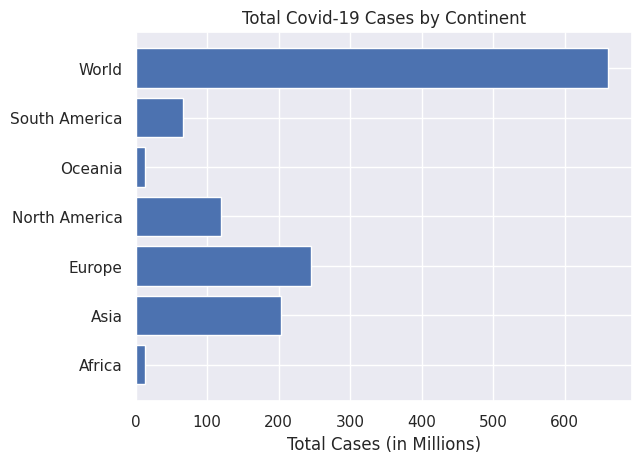

In [ ]:
#Create lists for the x and y axis to carry our variables 
mydata_xaxis = []
mydata_yaxis = []
#Opening the dataset and using a loop to read the dataset line by line instead of by column
with open('owid-covid-data-clean.csv') as data:
    csv_reader = csv.DictReader(data)
    for x in range(1,256576) :
        row = next(csv_reader)
        #Setting conditions for the data that will be stored in our x and y lists
        if row['date'] == '1/1/2023' and row['continent'] == '0' and (row['location'] == 'World' or row['location'] == 'Asia' or row['location'] == 'South America' or row['location'] == 'North America' or row['location'] == 'Europe' or row['location'] == 'Oceania' or row['location'] == 'Africa'):
            #Using the print function to test if the data selected is correct
            #print(row)
            #Appending the filtered data to our y and x lists
            mydata_xaxis.append(row['location'])
            mydata_yaxis.append(row['totalcases'])
#Using a for loop to convert our y axis variables from string to integer so they may be displayed correctly on our graph
for i in range(0, len(mydata_yaxis)):
    mydata_yaxis[i] = (int(mydata_yaxis[i]))/1000000

#Plotting a bar chart with the x and y lists
plt.barh(mydata_xaxis,mydata_yaxis)
#Adding labels and a title
plt.xlabel('Total Cases (in Millions)')
plt.title('Total Covid-19 Cases by Continent')
#Displaying the graph
plt.show()

**Total Cases Overtime from Beginning of Pandemic to 1/2/2023 Worldwide (Hajar)**

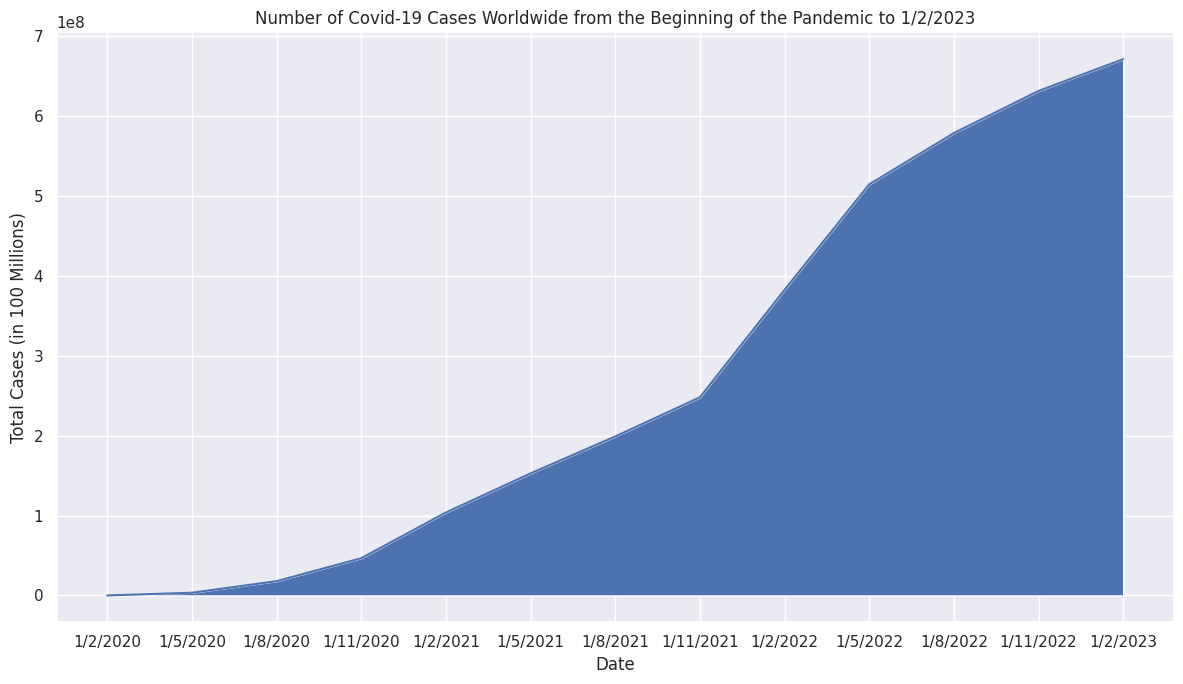

In [ ]:
#Create lists for the x and y axis to carry our variables 
mydata_xaxis = []
mydata_yaxis = []
#Opening the dataset and using a loop to read the dataset line by line instead of by column
with open('owid-covid-data-clean.csv') as data:
    csv_reader = csv.DictReader(data)
    for x in range(1,256576) :
        row = next(csv_reader)
        #Setting conditions for the data that will be stored in our x and y lists
        if row['continent'] == '0' and row['location'] == 'World' and (row['date'] == '1/2/2020' or row['date'] == '1/5/2020' or row['date'] == '1/8/2020' or row['date'] == '1/11/2020' or row['date'] == '1/2/2021' or row['date'] == '1/5/2021' or row['date'] == '1/8/2021' or row['date'] == '1/11/2021' or row['date'] == '1/2/2022' or row['date'] == '1/5/2022' or row['date'] == '1/8/2022' or row['date'] == '1/11/2022' or row['date'] == '1/2/2023'):
            #Using the print function to test if the data selected is correct
            #print(row)
            #Appending the filtered data to our y and x lists
            mydata_xaxis.append(row['date'])
            mydata_yaxis.append(row['totalcases'])
            #Using a for loop to convert our y axis variables from string to integer so they may be displayed correctly on our graph
            for i in range(0, len(mydata_yaxis)):
                mydata_yaxis[i] = int(mydata_yaxis[i])

#Specifying the size of the graph
plt.rcParams["figure.figsize"] = [12.00, 7.00]
plt.rcParams["figure.autolayout"] = True

#Plotting a line graph using our x and y variables
plt.plot(mydata_xaxis, mydata_yaxis)
#Adding a title and labels
plt.title('Number of Covid-19 Cases Worldwide from the Beginning of the Pandemic to 1/2/2023')
plt.ylabel('Total Cases (in 100 Millions)')
plt.xlabel('Date')
#Filling the space between the line and the bottom of the graph to create an area chart
plt.fill_between(mydata_xaxis, mydata_yaxis)
#Displaying the Graph
plt.show()


**Stackplot of the Total Cases Over Time for Each Continent from 1/3/2020 to 1/2/2023 (Hajar)**

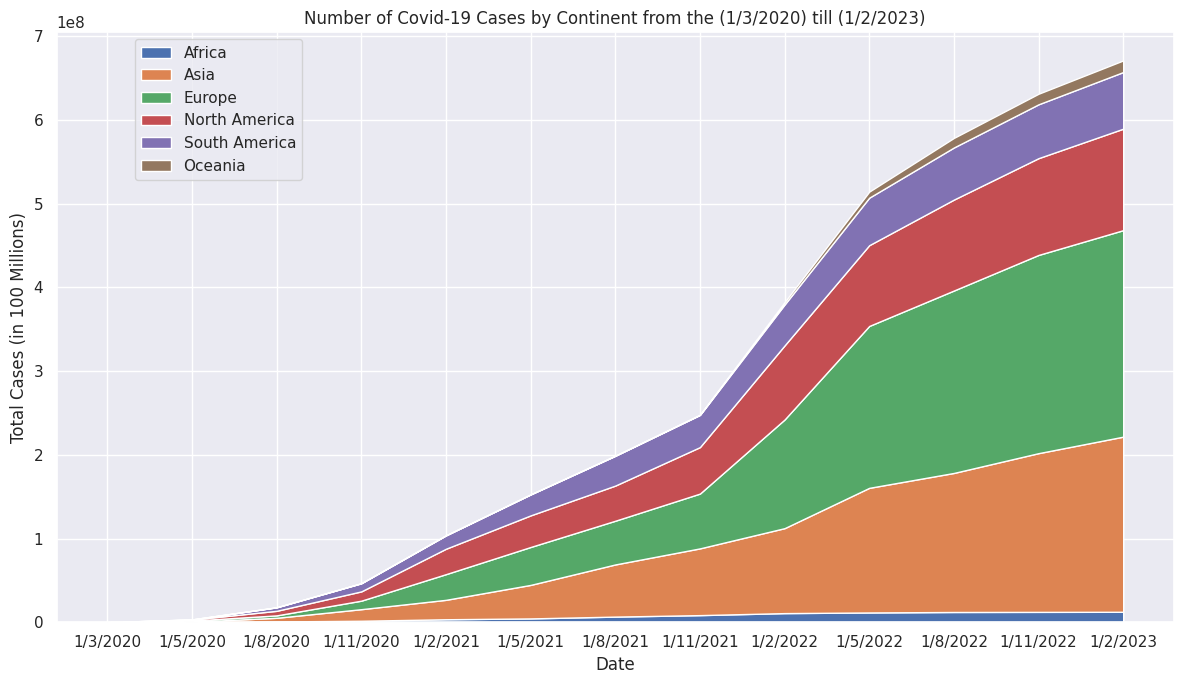

In [ ]:
#Create lists for the x axis and continents to carry our variables
mydata_xaxis = []
mydata_africa = []
mydata_asia = []
mydata_europe = []
mydata_north = []
mydata_south = []
mydata_oceania = []
#Create list for the labels we will use in our legend
labels = ['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania']
#Opening the dataset and using a loop to read the dataset line by line instead of by column
with open('owid-covid-data-clean.csv') as data:
    csv_reader = csv.DictReader(data)
    for x in range(1,256576) :
        row = next(csv_reader)
        #For each continent and the x axis we set conditions for the data that will be stored in our lists,
        #Then we appended the filtered data to our lists
        #Then used a for loop to convert our continent variables from string to integer so they may be displayed correctly on our graph
        if row['continent'] == '0' and (row['location'] == 'Africa') and (row['date'] == '1/3/2020' or row['date'] == '1/5/2020' or row['date'] == '1/8/2020' or row['date'] == '1/11/2020' or row['date'] == '1/2/2021' or row['date'] == '1/5/2021' or row['date'] == '1/8/2021' or row['date'] == '1/11/2021' or row['date'] == '1/2/2022' or row['date'] == '1/5/2022' or row['date'] == '1/8/2022' or row['date'] == '1/11/2022' or row['date'] == '1/2/2023'):
            #print(row)
            #We used the print function to test if each row produced the correct filtered data
            mydata_africa.append(row['totalcases'])
            for i in range(0, len(mydata_africa)):
                mydata_africa[i] = int(mydata_africa[i])
        if row['continent'] == '0' and (row['location'] == 'Asia') and (row['date'] == '1/3/2020' or row['date'] == '1/5/2020' or row['date'] == '1/8/2020' or row['date'] == '1/11/2020' or row['date'] == '1/2/2021' or row['date'] == '1/5/2021' or row['date'] == '1/8/2021' or row['date'] == '1/11/2021' or row['date'] == '1/2/2022' or row['date'] == '1/5/2022' or row['date'] == '1/8/2022' or row['date'] == '1/11/2022' or row['date'] == '1/2/2023'):
            mydata_xaxis.append(row['date'])
            mydata_asia.append(row['totalcases'])
            for i in range(0, len(mydata_asia)):
                mydata_asia[i] = int(mydata_asia[i])
        if row['continent'] == '0' and (row['location'] == 'Europe') and (row['date'] == '1/3/2020' or row['date'] == '1/5/2020' or row['date'] == '1/8/2020' or row['date'] == '1/11/2020' or row['date'] == '1/2/2021' or row['date'] == '1/5/2021' or row['date'] == '1/8/2021' or row['date'] == '1/11/2021' or row['date'] == '1/2/2022' or row['date'] == '1/5/2022' or row['date'] == '1/8/2022' or row['date'] == '1/11/2022' or row['date'] == '1/2/2023'):
            mydata_europe.append(row['totalcases'])
            for i in range(0, len(mydata_europe)):
                mydata_europe[i] = int(mydata_europe[i])
        if row['continent'] == '0' and (row['location'] == 'North America') and (row['date'] == '1/3/2020' or row['date'] == '1/5/2020' or row['date'] == '1/8/2020' or row['date'] == '1/11/2020' or row['date'] == '1/2/2021' or row['date'] == '1/5/2021' or row['date'] == '1/8/2021' or row['date'] == '1/11/2021' or row['date'] == '1/2/2022' or row['date'] == '1/5/2022' or row['date'] == '1/8/2022' or row['date'] == '1/11/2022' or row['date'] == '1/2/2023'):
            mydata_north.append(row['totalcases'])
            for i in range(0, len(mydata_north)):
                mydata_north[i] = int(mydata_north[i])
        if row['continent'] == '0' and (row['location'] == 'South America') and (row['date'] == '1/3/2020' or row['date'] == '1/5/2020' or row['date'] == '1/8/2020' or row['date'] == '1/11/2020' or row['date'] == '1/2/2021' or row['date'] == '1/5/2021' or row['date'] == '1/8/2021' or row['date'] == '1/11/2021' or row['date'] == '1/2/2022' or row['date'] == '1/5/2022' or row['date'] == '1/8/2022' or row['date'] == '1/11/2022' or row['date'] == '1/2/2023'):
            mydata_south.append(row['totalcases'])
            for i in range(0, len(mydata_south)):
                mydata_south[i] = int(mydata_south[i])
        if row['continent'] == '0' and (row['location'] == 'Oceania') and (row['date'] == '1/3/2020' or row['date'] == '1/5/2020' or row['date'] == '1/8/2020' or row['date'] == '1/11/2020' or row['date'] == '1/2/2021' or row['date'] == '1/5/2021' or row['date'] == '1/8/2021' or row['date'] == '1/11/2021' or row['date'] == '1/2/2022' or row['date'] == '1/5/2022' or row['date'] == '1/8/2022' or row['date'] == '1/11/2022' or row['date'] == '1/2/2023'):
            mydata_oceania.append(row['totalcases'])
            for i in range(0, len(mydata_oceania)):
                mydata_oceania[i] = int(mydata_oceania[i])

#Specifying the size of the graph
plt.rcParams["figure.figsize"] = [12.00, 7.00]
plt.rcParams["figure.autolayout"] = True

#Plotting a stackplot with the x axis and the continent as the y axis and the labels are the labels list
plt.stackplot(mydata_xaxis, mydata_africa, mydata_asia, mydata_europe, mydata_north, mydata_south, mydata_oceania, labels = labels)
#Adding a title and x and y axis labels 
plt.title('Number of Covid-19 Cases by Continent from the (1/3/2020) till (1/2/2023)')
plt.ylabel('Total Cases (in 100 Millions)')
plt.xlabel('Date')
#Adding a legend
plt.legend(loc=(.07, .75))
#Displaying the graph
plt.show()

**Stackplot for total vaccinated over time by country 1/1/2023 (hessa)**

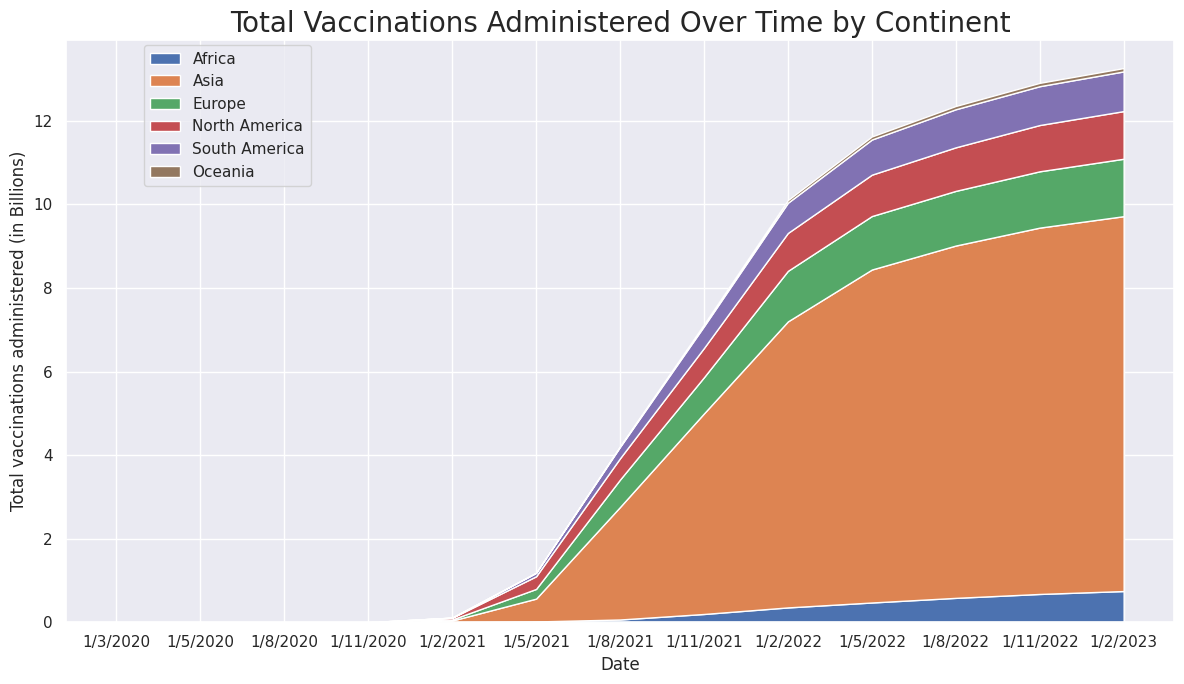

In [ ]:
mydata_xaxis = []
mydata_africa = []
mydata_asia = []
mydata_europe = []
mydata_north = []
mydata_south = []
mydata_oceania = []
labels = ['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania']
with open ('owid-covid-data-clean.csv', 'r') as csvfile:
    lines = csv.DictReader (csvfile)
    for x in range (1,256576):
        row = next(lines)
        if row['continent'] == '0' and (row['location'] == 'Africa') and (row['date'] == '1/3/2020' or row['date'] == '1/5/2020' or row['date'] == '1/8/2020' or row['date'] == '1/11/2020' or row['date'] == '1/2/2021' or row['date'] == '1/5/2021' or row['date'] == '1/8/2021' or row['date'] == '1/11/2021' or row['date'] == '1/2/2022' or row['date'] == '1/5/2022' or row['date'] == '1/8/2022' or row['date'] == '1/11/2022' or row['date'] == '1/2/2023'):
            # print(row)
            mydata_africa.append(row['total_vaccinations'])
            
        if row['continent'] == '0' and (row['location'] == 'Asia') and (row['date'] == '1/3/2020' or row['date'] == '1/5/2020' or row['date'] == '1/8/2020' or row['date'] == '1/11/2020' or row['date'] == '1/2/2021' or row['date'] == '1/5/2021' or row['date'] == '1/8/2021' or row['date'] == '1/11/2021' or row['date'] == '1/2/2022' or row['date'] == '1/5/2022' or row['date'] == '1/8/2022' or row['date'] == '1/11/2022' or row['date'] == '1/2/2023'):
            mydata_xaxis.append(row['date'])
            mydata_asia.append(row['total_vaccinations'])

        if row['continent'] == '0' and (row['location'] == 'Europe') and (row['date'] == '1/3/2020' or row['date'] == '1/5/2020' or row['date'] == '1/8/2020' or row['date'] == '1/11/2020' or row['date'] == '1/2/2021' or row['date'] == '1/5/2021' or row['date'] == '1/8/2021' or row['date'] == '1/11/2021' or row['date'] == '1/2/2022' or row['date'] == '1/5/2022' or row['date'] == '1/8/2022' or row['date'] == '1/11/2022' or row['date'] == '1/2/2023'):
            mydata_europe.append(row['total_vaccinations'])

        if row['continent'] == '0' and (row['location'] == 'North America') and (row['date'] == '1/3/2020' or row['date'] == '1/5/2020' or row['date'] == '1/8/2020' or row['date'] == '1/11/2020' or row['date'] == '1/2/2021' or row['date'] == '1/5/2021' or row['date'] == '1/8/2021' or row['date'] == '1/11/2021' or row['date'] == '1/2/2022' or row['date'] == '1/5/2022' or row['date'] == '1/8/2022' or row['date'] == '1/11/2022' or row['date'] == '1/2/2023'):
            mydata_north.append(row['total_vaccinations'])

        if row['continent'] == '0' and (row['location'] == 'South America') and (row['date'] == '1/3/2020' or row['date'] == '1/5/2020' or row['date'] == '1/8/2020' or row['date'] == '1/11/2020' or row['date'] == '1/2/2021' or row['date'] == '1/5/2021' or row['date'] == '1/8/2021' or row['date'] == '1/11/2021' or row['date'] == '1/2/2022' or row['date'] == '1/5/2022' or row['date'] == '1/8/2022' or row['date'] == '1/11/2022' or row['date'] == '1/2/2023'):
            mydata_south.append(row['total_vaccinations'])

        if row['continent'] == '0' and (row['location'] == 'Oceania') and (row['date'] == '1/3/2020' or row['date'] == '1/5/2020' or row['date'] == '1/8/2020' or row['date'] == '1/11/2020' or row['date'] == '1/2/2021' or row['date'] == '1/5/2021' or row['date'] == '1/8/2021' or row['date'] == '1/11/2021' or row['date'] == '1/2/2022' or row['date'] == '1/5/2022' or row['date'] == '1/8/2022' or row['date'] == '1/11/2022' or row['date'] == '1/2/2023'):
            mydata_oceania.append(row['total_vaccinations'])

for i in range(0, len(mydata_africa)):
    mydata_africa[i] = (int(mydata_africa[i]))/1000000000
for i in range(0, len(mydata_south)):
    mydata_south[i] = (int(mydata_south[i]))/1000000000
for i in range(0, len(mydata_oceania)):
    mydata_oceania[i] = (int(mydata_oceania[i]))/1000000000
for i in range(0, len(mydata_asia)):
    mydata_asia[i] = (int(mydata_asia[i]))/1000000000
for i in range(0, len(mydata_europe)):
    mydata_europe[i] = (int(mydata_europe[i]))/1000000000
for i in range(0, len(mydata_north)):
    mydata_north[i] = (int(mydata_north[i]))/1000000000

plt.rcParams["figure.figsize"] = [12.00, 7.00]
plt.rcParams["figure.autolayout"] = True

plt.stackplot(mydata_xaxis, mydata_africa, mydata_asia, mydata_europe, mydata_north, mydata_south, mydata_oceania, labels = labels)
plt.xlabel('Date')
plt.ylabel('Total vaccinations administered (in Billions)')
plt.title('Total Vaccinations Administered Over Time by Continent', fontsize=20)
plt.legend(loc=(.07, .75))
plt.show()




**Bubble Graph for the total deaths on 1/1/2023, x axis is population and y axis is total deaths (Naama)**


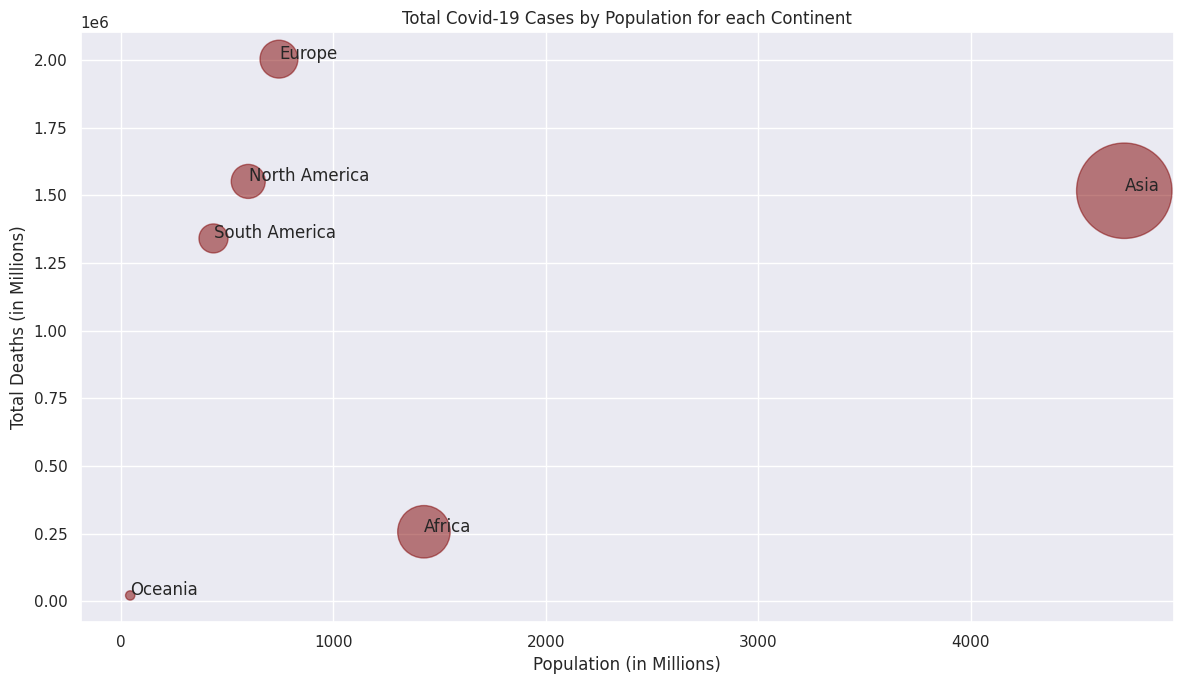

In [ ]:

mydata_xaxis = []
mydata_yaxis = []
with open('owid-covid-data-clean.csv') as data:
    csv_reader = csv.DictReader(data)
    for x in range(1,256576) :
        row = next(csv_reader)
        if row['date'] == '1/1/2023' and (row['location'] == 'Asia' or row['location'] == 'South America' or row['location'] == 'North America' or row['location'] == 'Europe' or row['location'] == 'Oceania' or row['location'] == 'Africa'):
            #print(row)
            mydata_xaxis.append(row['population'])
            mydata_yaxis.append(row['totaldeaths'])
for i in range(0, len(mydata_yaxis)):
    mydata_yaxis[i] = int(mydata_yaxis[i])
for i in range(0, len(mydata_xaxis)):
    mydata_xaxis[i] = (int(mydata_xaxis[i]))/1000000

plt.rcParams["figure.figsize"] = [12.00, 7.00]
plt.rcParams["figure.autolayout"] = True

plt.scatter(mydata_xaxis, mydata_yaxis, s=mydata_xaxis, alpha=0.5, color='maroon')
#Code to Add Labels for each Continents
points = ['Africa','Asia','Europe','North America','Oceania','South America']
for i, txt in enumerate(points):
   plt.annotate(txt, (mydata_xaxis[i]+1.5, mydata_yaxis[i]))

plt.xlabel('Population (in Millions)')
plt.ylabel('Total Deaths (in Millions)')
plt.title('Total Covid-19 Cases by Population for each Continent')
plt.show()



**Pie chart showing total cases for each continent by 1/1/2023 (Reem)**


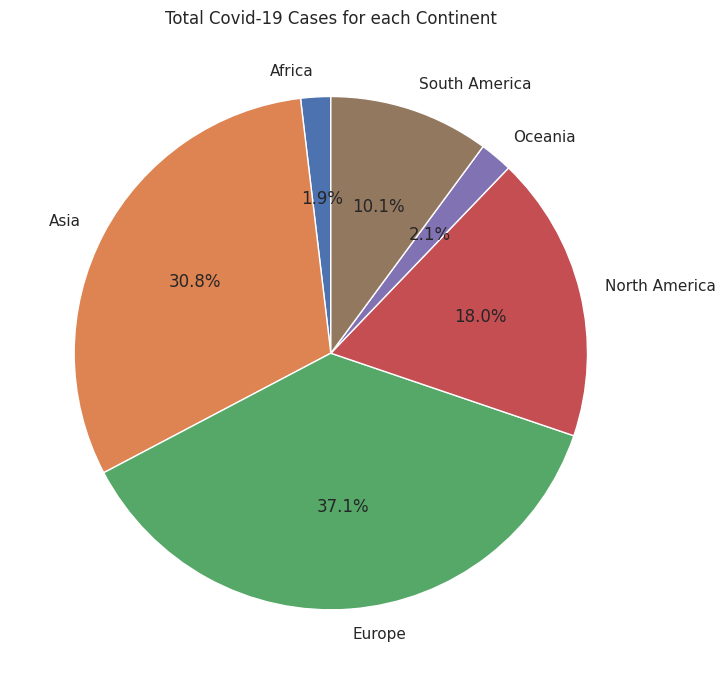

In [ ]:
#Create lists for the x and y axis to carry our variables
mydata_xaxis = []
mydata_yaxis = []
#Opening the dataset and using a loop to read the dataset line by line instead of by column
with open('owid-covid-data-clean.csv') as data:
    csv_reader = csv.DictReader(data)
    for x in range(1,256576) :
        row = next(csv_reader)
        #Setting conditions for the data that will be stored in our x and y lists
        if row['date'] == '1/1/2023' and (row['location'] == 'Asia' or row['location'] == 'South America' or row['location'] == 'North America' or row['location'] == 'Europe' or row['location'] == 'Oceania' or row['location'] == 'Africa'):
              #print(row)
              #Appending the filtered data to our y and x lists
            mydata_xaxis.append(row['location'])
            mydata_yaxis.append(row['totalcases'])

#plt.pie will plot the piechart using the x and y axis we had, autopct is where the percentage shows on each slice
#startangle is for what angle each pie should start at
plt.pie(mydata_yaxis, labels=mydata_xaxis, autopct='%1.1f%%', startangle=90)
plt.title('Total Covid-19 Cases for each Continent') #the title of the graph
plt.show() #display graph


**Scatter PLot for the total death per million (1/1/2023) by the human development index of the continents (Hessa)**

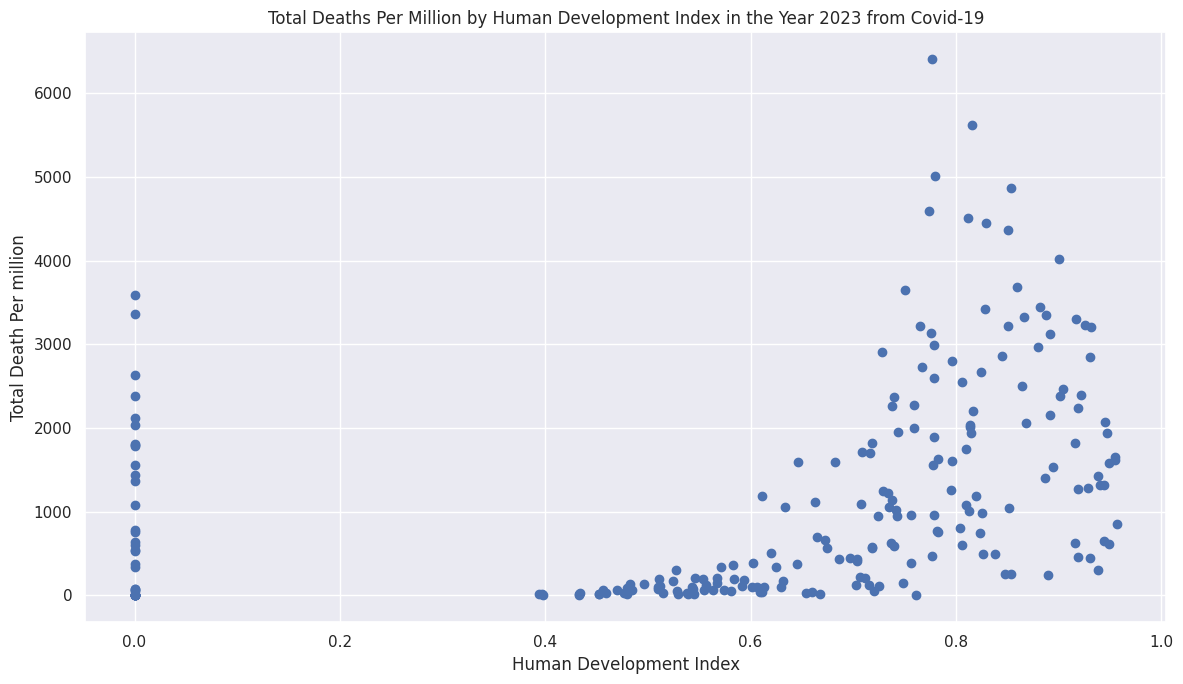

In [ ]:
mydata_xaxis = []
mydata_yaxis = []

with open('owid-covid-data-clean.csv', 'r') as csvfile:
    lines = csv.DictReader(csvfile)
    for x in range(1,256576):
        row = next(lines)
        if row['date'] == '1/1/2023' and (row['continent'] == 'Asia' or row['continent'] == 'Africa' or row['continent'] == 'North America' or row['continent'] == 'South America' or row['continent'] == 'Oceania' or row['continent'] == 'Europe'):
            #print(row)
            mydata_xaxis.append(row['human_development_index'])
            for i in range(0, len(mydata_xaxis)):
                mydata_xaxis[i] = float(mydata_xaxis[i])
            mydata_yaxis.append(row['totaldeathspermillion'])
            for j in range(0, len(mydata_yaxis)):
                mydata_yaxis[j] = float(mydata_yaxis[j])

plt.rcParams["figure.figsize"] = [12.00, 7.00]
plt.rcParams["figure.autolayout"] = True

plt.scatter(mydata_xaxis,mydata_yaxis)
plt.xlabel('Human Development Index')
plt.ylabel('Total Death Per million')
plt.title('Total Deaths Per Million by Human Development Index in the Year 2023 from Covid-19')
#plt.fill_between(mydata_xaxis,mydata_yaxis)
plt.show()


**Bar graph showing total cases per million for each continent by 1/1/2023 (Reem)**

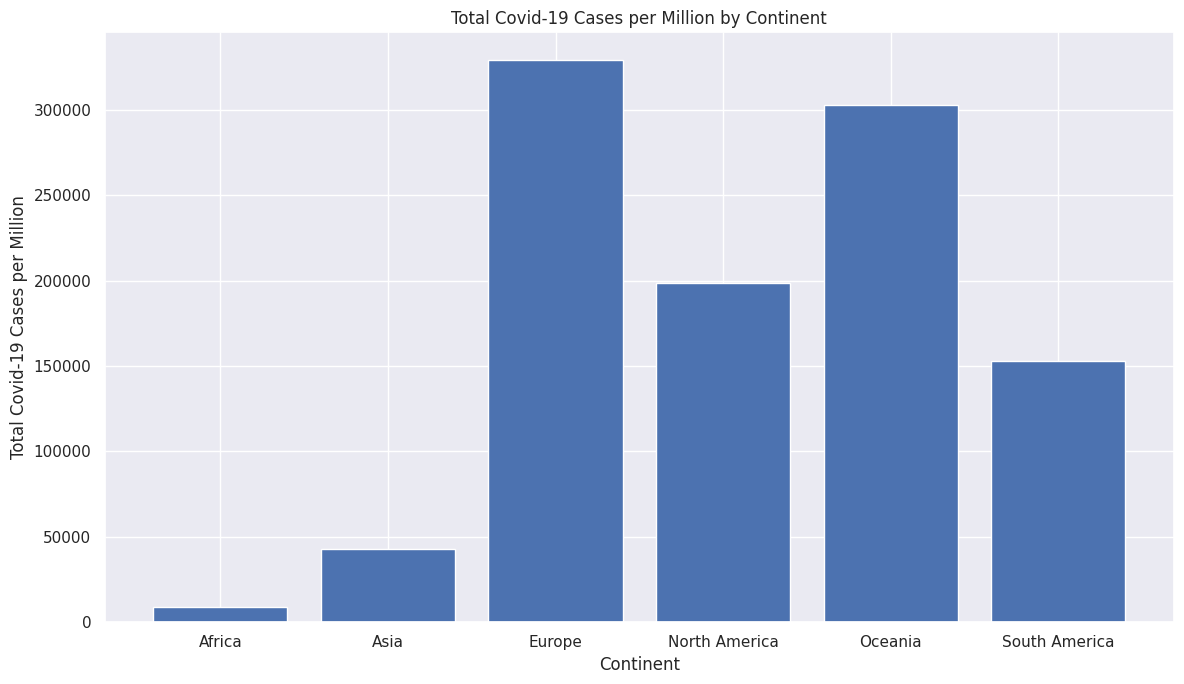

In [ ]:
#Create lists for the x and y axis to carry our variables
mydata_xaxis = []
mydata_yaxis = []
#Opening the dataset and using a loop to read the dataset line by line instead of by column
with open('owid-covid-data-clean.csv') as data:
    csv_reader = csv.DictReader(data)
    for x in range(1, 256576):
        row = next(csv_reader)
        #Setting conditions for the data that will be stored in our x and y lists
        if row['date'] == '1/1/2023' and row['continent'] == '0' and (row['location'] == 'Asia' or row['location'] == 'South America' or row['location'] == 'North America' or row['location'] == 'Europe' or row['location'] == 'Oceania' or row['location'] == 'Africa'):
           #Appending the filtered data to our y and x lists
            mydata_xaxis.append(row['location'])
            mydata_yaxis.append(float(row['totalcasespermillion'])) #takes it as a float as it decimals 

plt.rcParams["figure.figsize"] = [12.00, 7.00] #sets the size of the figure to be 12 inches wide and 7 inches high.
plt.rcParams["figure.autolayout"] = True #s a setting that automatically adjusts the spacing between the subplots to fit the contents of the figure. It can help prevent overlapping of labels, titles, and other elements in the figure

#plots the bar graph according to my x and y axis
plt.bar(mydata_xaxis, mydata_yaxis)
#graph labels and title
plt.title('Total Covid-19 Cases per Million by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Covid-19 Cases per Million')
plt.show() #display the graph

